In [26]:
import numpy as np
import matplotlib.pylab as plt
# plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

import gzip
import shutil, os, sys
import pandas as pd
import json
# from commands import getoutput as cmd
# from scipy import ndimage
# from time import time

%matplotlib inline

In [27]:
current_dir = os.getcwd()
for mod in ['plot_functions', 'feature_functions']:
    if mod in sys.modules: 
        del sys.modules[mod]

from feature_functions import *   
from plot_functions import *


In [28]:
# Print some details about the simulation notebook
example_name = "example_image"
example_dir = "/".join([current_dir,example_name])
fname = "/".join([example_name,'params.json'])
params = json.load(open(fname))
print params
    


{u'stop_tol': 0.01, u'zmax': 20, u'zseal': 20.0, u'seed': 1, u'ncol': 20, u'tsat_min': 0, u'sigma_y': 3, u'sigma_x': 2, u'vegtype': u'image', u'epsh': 0.0002, u'itype4': 1, u'dz': 1.0, u'tr': 5, u'dt_r': 2.0, u'print_count': 5, u'KsB': 0.2, u'H_i': -340.0, u'save_sve': 1, u'image_name': u'imp_fract_0.304.JPG', u'topo': u'plane', u'So': 0.02, u'dx': 1.0, u'alpha': 0.1, u'ponding': 1, u'Ks': 2, u'nrow': 40, u'fV': 0.2, u'p': 5.0, u'itype1': 0, u'itype3': 1, u'itype2': 1, u'drainBC': u'free', u'dt_sw': 0.001, u'tmax_scale': 3}


In [29]:
sim_file = '/'.join([example_dir,  'sim.pklz' ]) 
f = gzip.open(sim_file,'rb')
sim = pickle.load(f) 
f.close()  
sim = pd.Series(sim)

In [30]:
# specify parameters to generate the features
rvl_params = {'edge': 1, 'saturate' : 50, 'window': 'L0', 'gsigma' : [0, 2]}
# dictionary of feature arrays 
ptrn_dict = RF_patterns(sim.isvegc, rvl_params)

ptrn_dict['d2divide'] = sim['d2divide']
# get list of features from ptrn_dict
feature_keys =  ptrn_dict.keys() 
# lists of vegetated and bare cell features
veg_feat = [feat for feat in feature_keys if 'B' in feat] + ['d2divide']
bare_feat = [feat for feat in feature_keys if 'V' in feat] + ['d2divide']


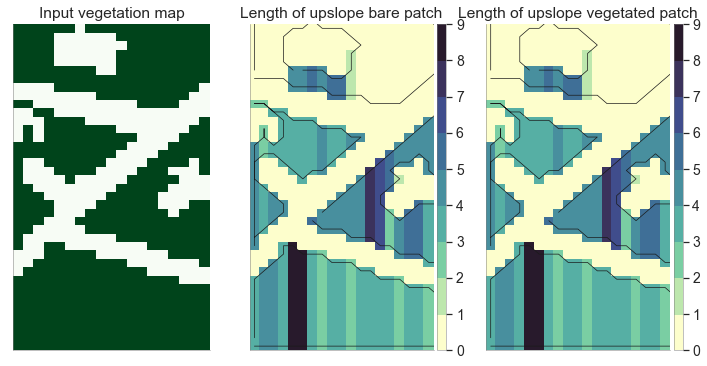

In [35]:
plt.figure(figsize = (12,6), )

ax = plt.subplot(131)
colormap(sim, ptrn_dict['isvegc'], ax, cmap = 'Greens', colorbar=False)
ax.set_title('Input vegetation map')


ax = plt.subplot(132)
colormap(sim, ptrn_dict['patchLB'], ax, cfontsize=14)
ax.set_title('Length of upslope bare patch')
plot_c(sim.isvegc, dx = sim.dx, ax = ax)

ax = plt.subplot(133)
colormap(sim, ptrn_dict['patchLB'], ax, cfontsize=14)
ax.set_title('Length of upslope vegetated patch')
plot_c(sim.isvegc, dx = sim.dx, ax = ax)



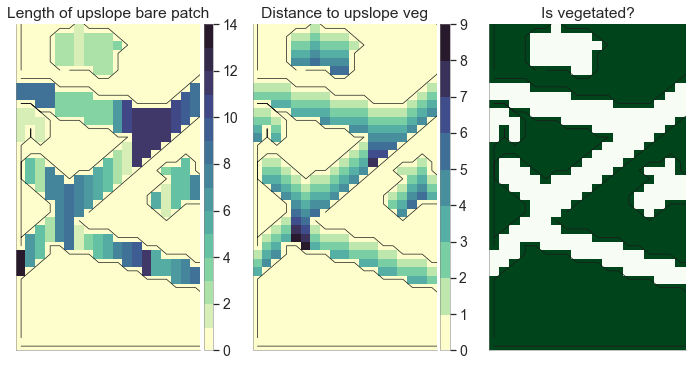

In [34]:
plt.figure(figsize = (12,6), )
ax1 = plt.subplot(131)
colormap(sim, ptrn_dict['bareLV'], ax1)
ax1.set_title('Length of upslope bare patch')
plot_c(sim.isvegc, dx = sim.dx, ax = ax1)
ax2 = plt.subplot(132)
colormap(sim, ptrn_dict['d2uV'], ax2)
ax2.set_title('Distance to upslope veg')
plot_c(sim.isvegc, dx = sim.dx, ax = ax2)

ax2 = plt.subplot(133)
colormap(sim, ptrn_dict['isvegc'], ax2, cmap = 'Greens', colorbar=False)
ax2.set_title('Is vegetated?')
plot_c(sim.isvegc, dx = sim.dx, ax = ax2)

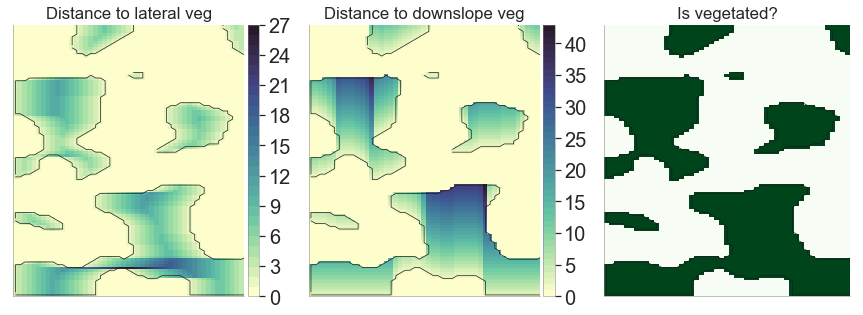

In [13]:
keys = sims.keys()
key = core[np.all([core.sigma == 4, core.fV == 0.4, core.p == core.p.max()], axis = 0)].index[0] 
sim  = sims[key]

rvl_params = {'edge': 1, 'saturate' : 50, 'window': 'L0', 'gsigma' : [0, 2]}
ptrn_dict = RF_patterns(sim.isvegc, rvl_params)
ptrn_dict['d2divide'] = sim['d2divide']


plt.figure(figsize = (15,5), )
ax1 = plt.subplot(131)
colormap(sim, ptrn_dict['d2xB'], ax1)
ax1.set_title('Distance to lateral veg')
plot_c(sim.isvegc, dx = sim.dx, ax = ax1)
ax2 = plt.subplot(132)
colormap(sim, ptrn_dict['d2dB'], ax2)
ax2.set_title('Distance to downslope veg')
plot_c(sim.isvegc, dx = sim.dx, ax = ax2)

ax2 = plt.subplot(133)
colormap(sim, ptrn_dict['isvegc'], ax2, cmap = 'Greens', colorbar=False)
ax2.set_title('Is vegetated?')
plot_c(sim.isvegc, dx = sim.dx, ax = ax2)

In [14]:
pattern_ravel, sim = redo_ravel(sim,feature_keys,rvl_params,'zinflc')

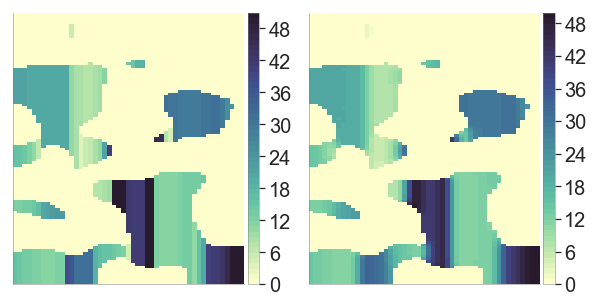

In [18]:
fig = plt.figure(figsize= (15,5))
plt.subplots_adjust(wspace = 0.2)

ax1 = plt.subplot(131)
colormap(sim,  sim['patchLB'], ax = ax1,   colorbar = True)


ax2 = plt.subplot(132)
colormap(sim, smoothV(sim['patchLB'], sim['isvegc'], 1),  ax = ax2, #bounds = bounds,
            colorbar = True)



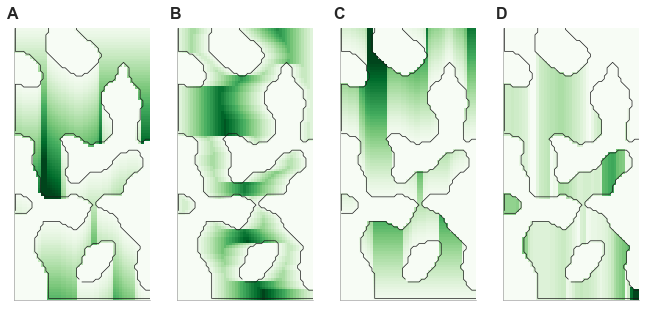

In [45]:
fig = plt.figure(figsize= (11.2,5.))
plt.subplots_adjust(wspace = 0.2)

key = core[np.all([core.sigma == 4, core.fV == 0.4, core.p == core.p.max()], axis = 0)].index[0] 

key = core[np.all([ core.sigma == 4, core.fV == 0.6], axis = 0)].index[0] 
sim  = sims[key]

pattern_ravel, sim = redo_ravel(sim,feature_keys,rvl_params,'zinflc')


ax1 = plt.subplot(141)
colormap(sim,  sim['d2uB'], ax = ax1,   colorbar = False, cmap = "Greens")
plot_c(sim.isvegc, dx = sim.dx, ax = ax1)

ax1 = plt.subplot(142)
colormap(sim,  sim['d2xB'], ax = ax1,   colorbar = False, cmap = "Greens")
plot_c(sim.isvegc, dx = sim.dx, ax = ax1)

ax1 = plt.subplot(143)
cplot = colormap(sim,  sim['d2dB'], ax = ax1,   colorbar = False,cmap = "Greens")
plot_c(sim.isvegc, dx = sim.dx, ax = ax1)


ax1 = plt.subplot(144)
cplot = colormap(sim,  sim['patchLB'], ax = ax1,   colorbar = False,cmap = "Greens")
plot_c(sim.isvegc, dx = sim.dx, ax = ax1)

for i, label in enumerate(('A', 'B', 'C', 'D')):
    ax = plt.subplot(1,4,i+1)
    ax.text(-0.05, 1.08, label, transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top')

# cbaxes = fig.add_axes([.92, 0.13, 0.015, 0.75]) 
# cb = plt.colorbar(cplot, cax = cbaxes) 
# cb.set_label('$U_{max}$ (cm/s)', fontsize = 20)
# cb.ax.tick_params(labelsize=18) 



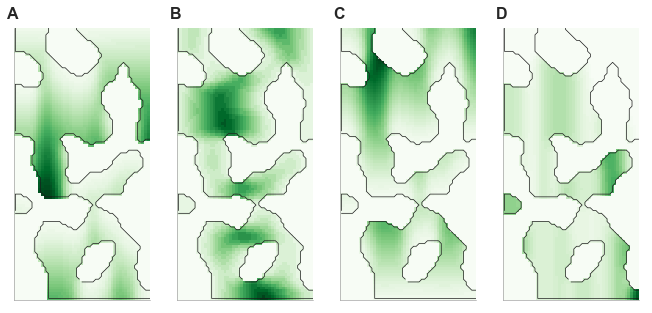

In [46]:
fig = plt.figure(figsize= (11.2,5.))
plt.subplots_adjust(wspace = 0.2)


key = core[np.all([core.sigma == 4, core.fV == 0.4, core.p == core.p.max()], axis = 0)].index[0] 

key = core[np.all([ core.sigma == 4, core.fV == 0.6], axis = 0)].index[0] 
sim  = sims[key]

pattern_ravel, sim = redo_ravel(sim,feature_keys,rvl_params,'zinflc')


ax1 = plt.subplot(141)
colormap(sim,  sim['d2uB_s2'], ax = ax1,   colorbar = False,  cmap = "Greens")
plot_c(sim.isvegc, dx = sim.dx, ax = ax1)

ax1 = plt.subplot(142)
colormap(sim,  sim['d2xB_s2'], ax = ax1,   colorbar = False,  cmap = "Greens")
plot_c(sim.isvegc, dx = sim.dx, ax = ax1)

ax1 = plt.subplot(143)
cplot = colormap(sim,  sim['d2dB_s2'], ax = ax1,   colorbar = False,  cmap = "Greens")
plot_c(sim.isvegc, dx = sim.dx, ax = ax1)


ax1 = plt.subplot(144)
cplot = colormap(sim,  sim['patchLB_s2'], ax = ax1,   colorbar = False,  cmap = "Greens")
plot_c(sim.isvegc, dx = sim.dx, ax = ax1)

for i, label in enumerate(('A', 'B', 'C', 'D')):
    ax = plt.subplot(1,4,i+1)
    ax.text(-0.05, 1.08, label, transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top')


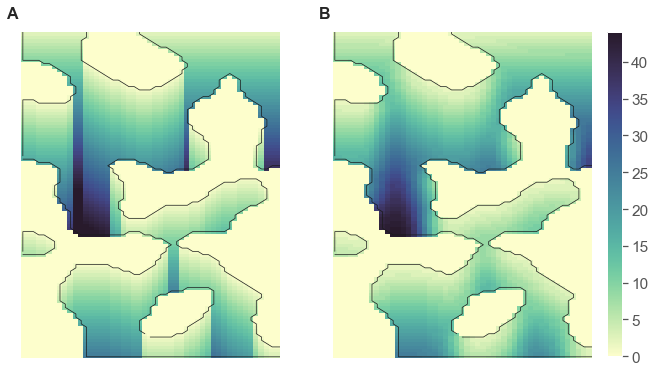

In [28]:

fig = plt.figure(figsize= (10.25,6))
plt.subplots_adjust(wspace = 0.2)

    
ax1 = plt.subplot(121)
sim  = sims[key]
df_colormap(sim,  sim['d2uB'], ax = ax1,   colorbar = False)
plot_c(sim.isvegc, ax = ax1, dx = sim.dx)

ax1 = plt.subplot(122)
df_colormap(sim,  sim['d2uB_s2'], ax = ax1,   colorbar = False)
plot_c(sim.isvegc, ax = ax1, dx = sim.dx)

for i, label in enumerate(('A', 'B')):
    ax = plt.subplot(1,2,i+1)
    ax.text(-0.05, 1.08, label, transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top')

cbaxes = fig.add_axes([.92, 0.13, 0.02, 0.75]) 
cb = plt.colorbar(cplot, cax = cbaxes) 
cb.set_label('', fontsize = 14)    



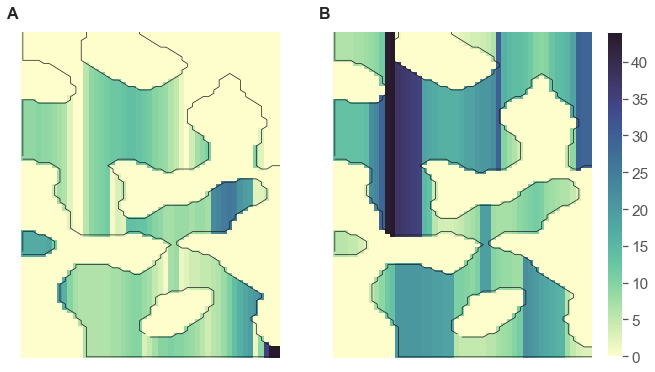

In [35]:

fig = plt.figure(figsize= (10.25,6))
plt.subplots_adjust(wspace = 0.2)

sim['patchLV'], sim['patchLB'] = get_patchL(sim.isvegc, 100) 

ax1 = plt.subplot(121)
sim  = sims[key]
df_colormap(sim,  sim['patchLB'], ax = ax1,   colorbar = False)
plot_c(sim.isvegc, ax = ax1, dx = sim.dx)

ax1 = plt.subplot(122)
df_colormap(sim,  sim['patchLV'], ax = ax1,   colorbar = False)
plot_c(sim.isvegc, ax = ax1, dx = sim.dx)

for i, label in enumerate(('A', 'B')):
    ax = plt.subplot(1,2,i+1)
    ax.text(-0.05, 1.08, label, transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top')

cbaxes = fig.add_axes([.92, 0.13, 0.02, 0.75]) 
cb = plt.colorbar(cplot, cax = cbaxes) 
cb.set_label('', fontsize = 14)    



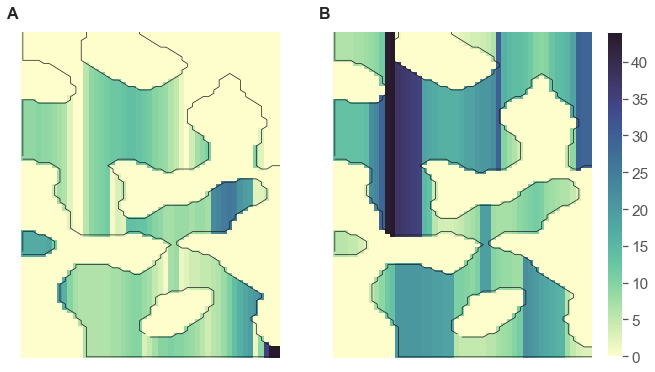

In [34]:

fig = plt.figure(figsize= (10.25,6))
plt.subplots_adjust(wspace = 0.2)

}

ax1 = plt.subplot(121)
sim  = sims[key]
df_colormap(sim,  sim['patchLB'], ax = ax1,   colorbar = False)
plot_c(sim.isvegc, ax = ax1, dx = sim.dx)

ax1 = plt.subplot(122)
df_colormap(sim,  sim['patchLV'], ax = ax1,   colorbar = False)
plot_c(sim.isvegc, ax = ax1, dx = sim.dx)

for i, label in enumerate(('A', 'B')):
    ax = plt.subplot(1,2,i+1)
    ax.text(-0.05, 1.08, label, transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top')

cbaxes = fig.add_axes([.92, 0.13, 0.02, 0.75]) 
cb = plt.colorbar(cplot, cax = cbaxes) 
cb.set_label('', fontsize = 14)    



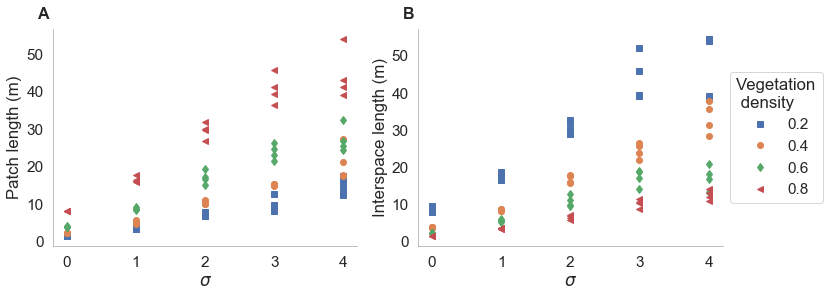

In [28]:

pch = {}
for key in sims.keys():
    sim = sims[key]
    pch[key] = {}
    pch[key]['sigma'] = sim.sigma
    pch[key]['fV'] = sim.fV    
    patchL = get_patchL(sim.isvegc, 100)[0]
    pch[key]['LV'] =   patchL[patchL>0].mean()
    pch[key]['LV_std'] =   patchL[patchL>0].std()

    bareL = get_bareL(sim.isvegc, 100)[0]
    pch[key]['LB'] =   bareL[bareL>0].mean()
    pch[key]['LB_std'] =   bareL[bareL>0].std()
    
    
pch = pd.DataFrame(pch).T


fig = plt.figure(figsize= (12,4))
plt.subplots_adjust(wspace = 0.2)

ax1 = plt.subplot(121)

for f in np.unique(pch.fV):
    dum = pch[pch.fV == f].sort_values('sigma')
    plt.plot(dum.sigma, dum.LV, next(linecycler))

plt.ylabel('Patch length (m)')
plt.xlabel('$\sigma$')

ax1 = plt.subplot(122)

for f in np.unique(pch.fV):
    dum = pch[pch.fV == f].sort_values('sigma')
    plt.plot(dum.sigma, dum.LB, next(linecycler), label = f)

plt.ylabel('Interspace length (m)')
plt.xlabel('$\sigma$')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Vegetation\n density')

for i, label in enumerate(('A', 'B')):
    ax = plt.subplot(1,2,i+1)
    ax.text(-0.05, 1.1, label, transform=ax.transAxes,
          fontsize=16, fontweight='bold', va='top')

# plt.savefig('{0}/sigmas.png',bbox_inches='tight')


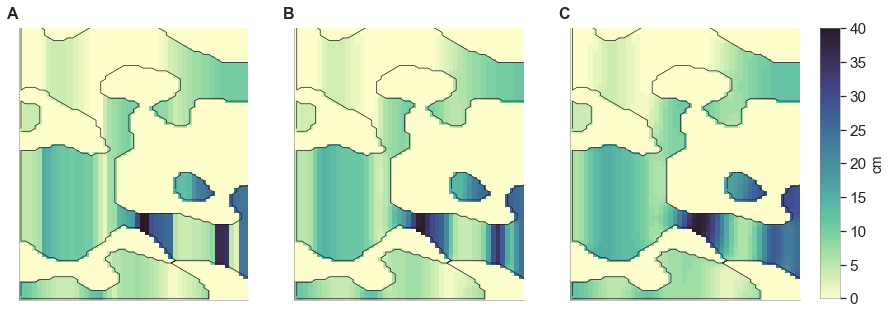

In [29]:
keys = sims.keys()
key = core[np.all([core.sigma == 4, core.fV == 0.6, core.p == core.p.max()], axis = 0)].index[0] 
sim  = sims[key]

rvl_params = {'edge': 1, 'saturate' : 50, 'window': 'L0', 'gsigma' : [0, 1, 2]}
ptrn_dict = RF_patterns(sim.isvegc, rvl_params)
ptrn_dict['d2divide'] = sim['d2divide']



fig = plt.figure(figsize= (14,5))
plt.subplots_adjust(wspace = 0.2)

    
ax1 = plt.subplot(131)
df_colormap(sim,  ptrn_dict['patchLB'], ax = ax1,   colorbar = False)
plot_c(sim.isvegc, ax = ax1, dx = sim.dx)

ax1 = plt.subplot(132)
df_colormap(sim,  ptrn_dict['patchLB_s1'], ax = ax1,   colorbar = False)
plot_c(sim.isvegc, ax = ax1, dx = sim.dx)

ax1 = plt.subplot(133)
cplot = df_colormap(sim,  ptrn_dict['patchLB_s2'], ax = ax1,   colorbar = False)
plot_c(sim.isvegc, ax = ax1, dx = sim.dx)

for i, label in enumerate(('A', 'B', 'C')):
    ax = plt.subplot(1,3,i+1)
    ax.text(-0.05, 1.08, label, transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top')
cbaxes = fig.add_axes([.92, 0.13, 0.02, 0.75]) 
cb = plt.colorbar(cplot, cax = cbaxes) 
cb.set_label('cm', fontsize = 14)    


Text(0.5,1,'1D uniform filter')

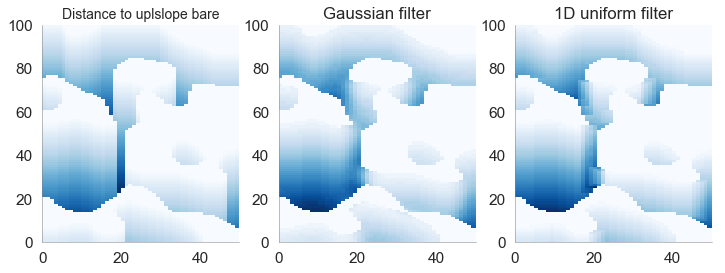

In [34]:
U = ptrn_dict['d2uB'].astype(float)
U[sim.isvegc == 0] = np.nan
V=U.copy()
V[U!=U]=0
VV=sp.ndimage.gaussian_filter(V,sigma=2.0)

W=0*U.copy()+1
W[U!=U]=0
WW=sp.ndimage.gaussian_filter(W,sigma=2.0)


Z=VV/WW
Z = Z.astype(int)
Z[sim.isvegc ==0] = 0

fig = plt.figure(figsize= (12,4))
ax1 = plt.subplot(131)
plt.pcolormesh(ptrn_dict['d2uB'].T, cmap = 'Blues')
plt.title('Distance to uplslope bare', fontsize = 14 )

ax2 = plt.subplot(132)
plt.pcolormesh( Z.T,   cmap = 'Blues')
plt.title('Gaussian filter')

U = ptrn_dict['d2uB'].astype(float)
U[sim.isvegc == 0] = np.nan
V=U.copy()
V[U!=U]=0
VV=sp.ndimage.uniform_filter1d(V, 5,0)

W=0*U.copy()+1
W[U!=U]=0
WW=sp.ndimage.uniform_filter1d(W, 5,0)
Z=VV/WW
Z = Z.astype(int)
Z[sim.isvegc ==0] = 0


ax2 = plt.subplot(133)
plt.pcolormesh( Z.T,   cmap = 'Blues')
plt.title('1D uniform filter')


In [35]:
# U = sim['d2uV'].astype(float)
def smoothit(U, isvegc, sigma):
    U = U.astype(float)
    U[isvegc == 1] = np.nan
    V=U.copy()
    V[U!=U]=0
    VV=sp.ndimage.gaussian_filter(V,sigma)

    W=0*U.copy()+1
    W[U!=U]=0
    WW=sp.ndimage.gaussian_filter(W,sigma)

    Z=VV/WW
    Z = Z.astype(int)
    Z[isvegc ==1] = 0
    return Z
    


Text(0.5,0.98,'Uplslope veg')

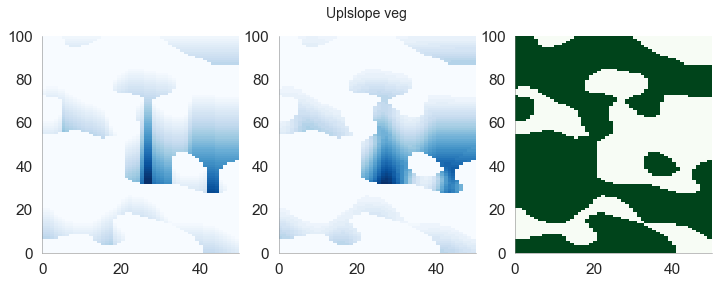

In [39]:

Z = smoothit(ptrn_dict['d2uV'], sim['isvegc'], 2)
fig = plt.figure(figsize= (12,4))
ax1 = plt.subplot(131)
plt.pcolor(ptrn_dict['d2uV'].T, cmap = 'Blues')


ax2 = plt.subplot(132)
plt.pcolor( Z.T,   cmap = 'Blues')

ax2 = plt.subplot(133)
plt.pcolor( sim.isvegc.T,   cmap = 'Greens')
plt.suptitle('Uplslope veg', fontsize = 14 )

Text(0.5,0.98,'Downslope veg')

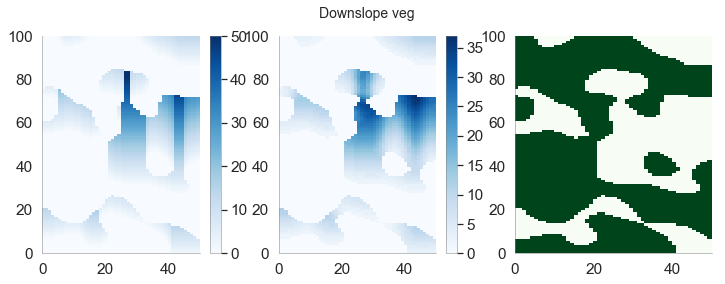

In [41]:
U = ptrn_dict['d2dV'].astype(float)
U[sim.isvegc == 1] = np.nan
V=U.copy()
V[U!=U]=0
VV=sp.ndimage.gaussian_filter(V,sigma=2.0)

W=0*U.copy()+1
W[U!=U]=0
WW=sp.ndimage.gaussian_filter(W,sigma=2.0)

Z=VV/WW
Z = Z.astype(int)
Z[sim.isvegc ==1] = 0


fig = plt.figure(figsize= (12,4))
ax1 = plt.subplot(131)
plt.pcolor(ptrn_dict['d2dV'].T, cmap = 'Blues')
plt.colorbar()

ax2 = plt.subplot(132)
plt.pcolor( Z.T,   cmap = 'Blues')
plt.colorbar()
ax2 = plt.subplot(133)
plt.pcolor( sim.isvegc.T,   cmap = 'Greens')
plt.suptitle('Downslope veg', fontsize = 14 )